In [7]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np
import sys
import os

sys.path.insert(0, "..")
from global_config import config

results_dir   = config.get_property('results_dir')
data_dir      = config.get_property('data_dir')

In [8]:
path_to_frcst_1 = os.path.join(results_dir, "forecast", "arima")
path_to_frcst_2 = os.path.join(results_dir, "forecast", "BD_eakf_model1")
path_to_frcst_3 = os.path.join(results_dir, "forecast", "BD_eakf_model2")
path_to_frcst_4 = os.path.join(results_dir, "forecast", "BD_eakf_model3")
path_to_frcst_5 = os.path.join(results_dir, "forecast", "sarima")

evals_df        = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores.csv"), parse_dates=["frsct_date"])
usa_df          = pd.read_csv(os.path.join(data_dir, "processed_data_us.csv"), parse_dates=["date"])
dates_forecasts = usa_df.date[11:].values

In [9]:
from utils.utils_eval import compute_evals

usa_df["date"] = pd.to_datetime(usa_df["date"])

evals_w_df = []
for idx, date in enumerate(dates_forecasts[:-6]):

    ts       = pd.to_datetime(str(date))
    d        = ts.strftime('%Y-%m-%d')
    date_str = pd.to_datetime(date).strftime("%Y-%m-%d")

    path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", "equal_weights")
    ens_df           = pd.read_csv(os.path.join(path_to_save_ens,  f"{date_str}.csv"), parse_dates=["date"])

    dates_use = ens_df.date
    fit_data  = usa_df[usa_df.date.isin((list(dates_use)))].set_index("date")[["total"]]

    eval1_df               = compute_evals(ens_df, fit_data)
    eval1_df["frsct_date"] = date
    eval1_df["method"]     = "equal_weights_ensemble"
    evals_w_df.append(eval1_df.reset_index())

evals_w_df = pd.concat(evals_w_df)
evals_w_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores_equal_weights.csv"), index=False)


/Users/chaosdonkey06/Dropbox/My Mac (Jaimes-MacBook-Pro.local)/Desktop/Shaman-lab/IMD_RetrospectiveForecasting/analyses/utils/utils_eval.py:52: RuntimeWarning: invalid value encountered in multiply
  iss = (upper-lowerr) + 2/alpha * (lowerr-obs) * (obs<lowerr) + 2/alpha * (obs-upper) * (obs>upper)


## Performance Ensemble all past performance

In [10]:
forecast_windows = {"1m": 1, "2m": 2, "3m": 3, "4m": 4, "5m": 5, "6m": 6}
evals_w_df       = []
dates_use        = dates_forecasts[6:]

for idx_date_use, date_use in enumerate(dates_use[:-6]):
    for fw in list(list(forecast_windows.keys())):

        date_str         = pd.to_datetime(date_use).strftime("%Y-%m-%d")
        path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", "all_past", f"wis", fw)

        try:
            ens_df           = pd.read_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))
        except:
            continue

        date_fit = ens_df.date
        fit_data = usa_df[usa_df.date.isin((list(date_fit)))].set_index("date")[["total"]]

        eval1_df               = compute_evals(ens_df, fit_data)
        eval1_df["frsct_date"] = date
        eval1_df["method"]     = f"all_past_ens"

        eval1_df["eval_horizon_ensemble" ] = fw
        eval1_df["forecast_date"] = date_use
        eval1_df["score"]         = "wis"
        eval1_df["type_ensemble"] = f"all_past_ens"
        evals_w_df.append(eval1_df.reset_index())

evals_w_df = pd.concat(evals_w_df)
evals_w_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores_all_past.csv"), index=False)


## Performance Ensemble K-past performance

In [12]:
evals_w_df      = []
dates_use       = dates_forecasts[6:]
past_points_use = [2, 3, 4, 5, 6]

for K in past_points_use:
    for idx_date_use, date_use in enumerate(dates_use[:-6]):
        for fw in list(list(forecast_windows.keys())):
            date_str         = pd.to_datetime(date_use).strftime("%Y-%m-%d")
            path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", f"{K}_months_past", fw)

            try:
                ens_df       = pd.read_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))
            except:
                print("date_str")
                continue

            date_fit = ens_df.date
            fit_data = usa_df[usa_df.date.isin((list(date_fit)))].set_index("date")[["total"]]

            eval1_df                           = compute_evals(ens_df, fit_data)
            eval1_df["frsct_date"]             = date
            eval1_df["method"]                 = f"{K}_past_ens"
            eval1_df["eval_horizon_ensemble" ] = fw
            eval1_df["forecast_date"]          = date_use
            eval1_df["score"]                  = "wis"
            eval1_df["type_ensemble"]          = f"{K}_past_ens"
            evals_w_df.append(eval1_df.reset_index())

evals_w_df = pd.concat(evals_w_df)
evals_w_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_scores_K_past.csv"), index=False)


date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str
date_str


# plot performance

In [13]:
all_past_df               = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation",  "BD_scores_all_past.csv"), parse_dates=["frsct_date"])
all_past_df["frsct_date"] = all_past_df["forecast_date"]

eq_weights_df             = pd.read_csv( os.path.join(results_dir, "forecast", "evaluation", "BD_scores_equal_weights.csv"), parse_dates=["frsct_date"])
k_past_df                 = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation",  "BD_scores_K_past.csv"), parse_dates=["frsct_date"])
k_past_df["frsct_date"]   = k_past_df["forecast_date"]

k_past                    = ['2_past_ens', '3_past_ens', '4_past_ens', '5_past_ens', '6_past_ens']
k_past_df                 = pd.concat([k_past_df, all_past_df])

In [14]:
%config InlineBackend.figure_format ='retina'
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns

weekdict = {'1m': 1, '2m': 2, '3m': 3, '4m': 4, '5m': 5, '6m': 6}

def format_type_label_ensmelbe(s):
    if s == "all_past_ens":
        return "All past"
    else:
        return s[0]+" months"

import pylab

NUM_COLORS = 6
cm         = pylab.get_cmap('gist_ncar')
paletteee  = [cm(idx_c/NUM_COLORS) for idx_c in range(NUM_COLORS)]


/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_56747/274071408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_56747/274071408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_56747/274071408.py:8: SettingWithCopyWa

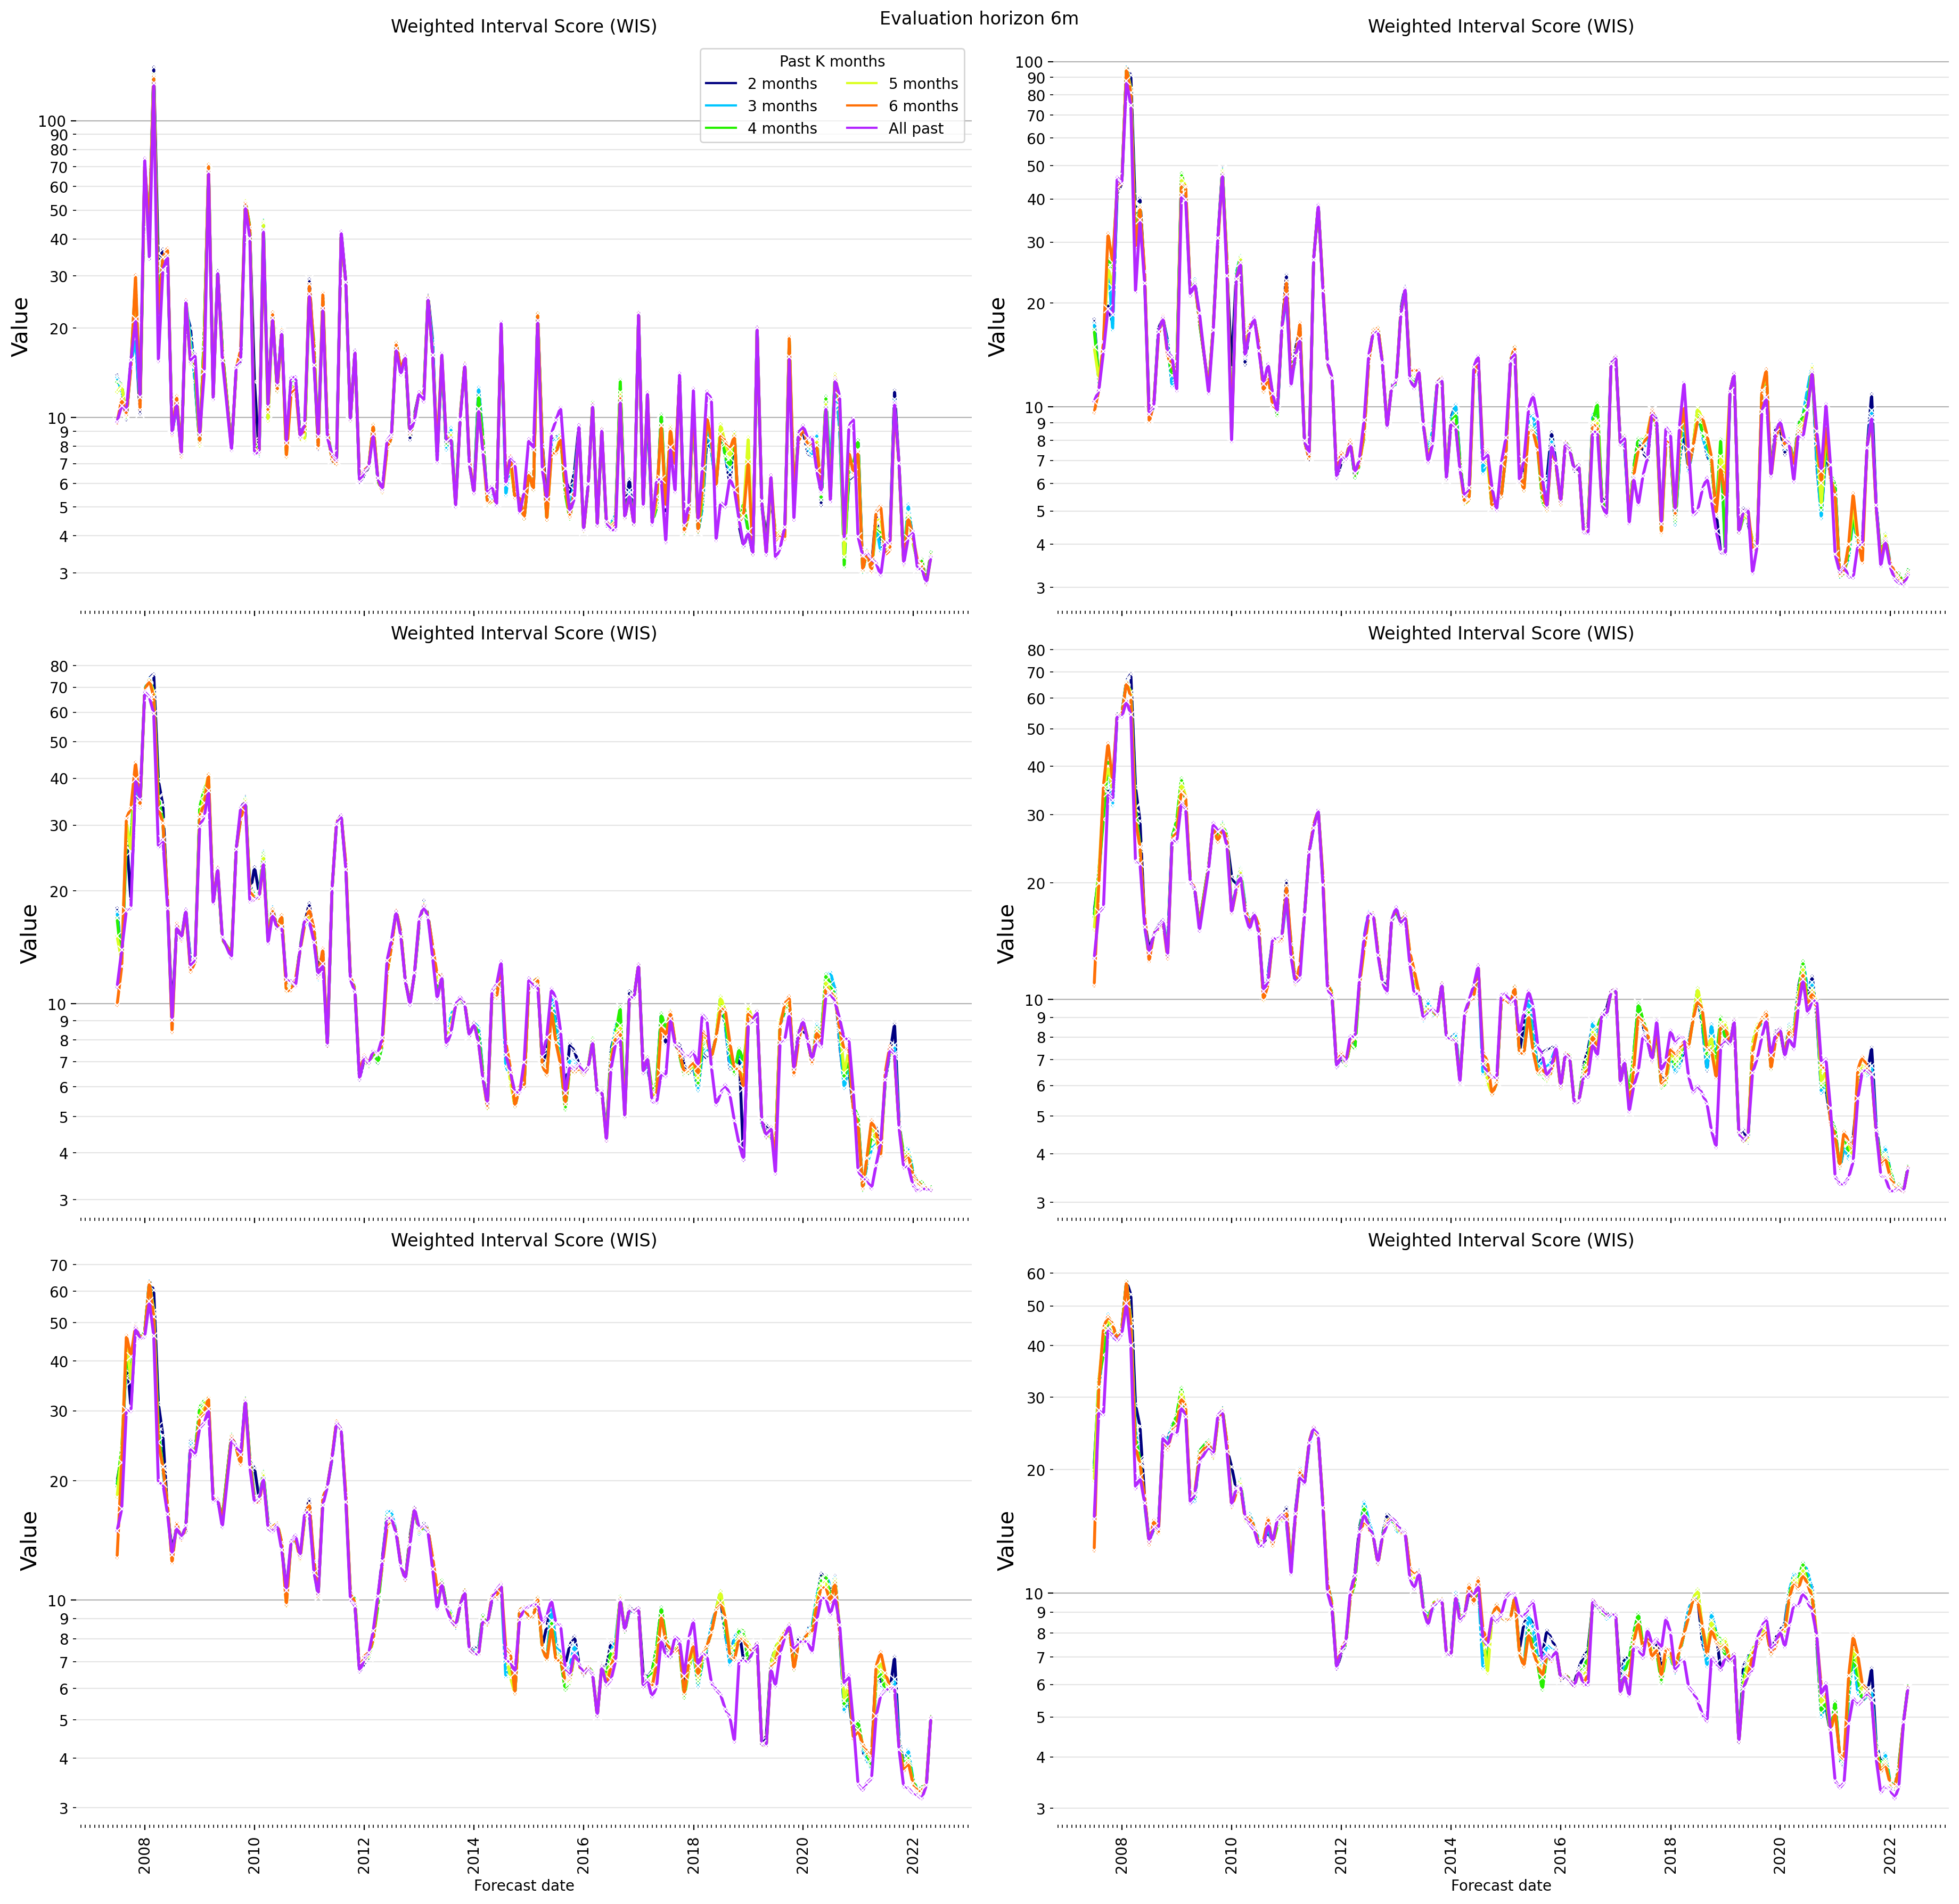

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(18.5, 18.2), sharex=True)


for idx_axi, ax in enumerate(axes.flatten()): #kw in weekdict.keys():

    kw = list(weekdict.keys())[idx_axi]
    df_stats_week                  = k_past_df[k_past_df.eval_horizon==kw]
    df_stats_week["forecast_date"] = pd.to_datetime(df_stats_week["forecast_date"])
    df_stats_week                  = df_stats_week.groupby(["forecast_date", "type_ensemble"]).mean().reset_index()
    df_stats_week["type_label"]    = df_stats_week.apply(lambda x: format_type_label_ensmelbe(x.type_ensemble), axis=1)

    sns.lineplot(ax=ax, data=df_stats_week, x="forecast_date", y="wis", marker='x', linestyle='-', hue="type_label", palette=paletteee, lw=2)

    ax.set_title('Weighted Interval Score (WIS)')
    ax.set_xlabel("Forecast date")
    ax.set_yscale("log")
    ax.legend()

    fig.suptitle(f"Evaluation horizon {kw}")

for idx_ax, ax in enumerate(axes.flatten()):
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    ax.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
    ax.yaxis.set_minor_formatter(ticker.StrMethodFormatter("{x:.0f}"))
    ax.set_ylabel('Value', size=15)
    ax.tick_params(which='both', axis='both', labelrotation=0)
    ax.tick_params(which='both', axis='x', labelrotation=90)

    if idx_ax==0:
        ax.legend(loc='upper right', title="Past K months", ncol=2)
    else:
        ax.legend_.remove()
    ax.axhline(y=0, color="k", lw=1.5, linestyle="--")

plt.tight_layout()
    #fig.savefig(os.path.join(results_dir, "forecast", "ensemble", f"window_size_eval_{kw}.png"), dpi=300, transparent=True)


In [16]:
scores_models_df = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "scores.csv"), parse_dates=["frsct_date"])
model_stats_df   = scores_models_df.copy()
ens_stats_df     = k_past_df.copy()

eq_weights_resume_df = eq_weights_df
ens_stats_df         = ens_stats_df[ens_stats_df.method.isin(["2_past_ens", "3_past_ens", "4_past_ens", "5_past_ens", "6_past_ens", "all_past_ens"])]
ens_stats_df         = ens_stats_df[ens_stats_df.eval_horizon_ensemble=="6m"]
plot_bars_df         = pd.concat([model_stats_df, ens_stats_df, eq_weights_resume_df])


# All time series performance

In [17]:
years          = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pre_vac_years  = years[:6]
post_vac_years = years[6:]


In [18]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["arima", "eakf_model1", "eakf_model2", "eakf_model3"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)


for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.1), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()


KeyError: 'sarima'

In [ ]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"]      = "All"
plot_bars_df["frsct_date"]  = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year']        = plot_bars_df.frsct_date.dt.year
plot_bars_df['year']        = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["arima", "eakf_model1", "eakf_model2", "eakf_model3"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="winter_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1.1), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()

plt.tight_layout()


In [ ]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"] = "All"
plot_bars_df["frsct_date"] = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year'] = plot_bars_df.frsct_date.dt.year
plot_bars_df['year'] = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["eakf_model3", "2_past_ens", "all_past_ens", "equal_weights_ensemble"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)


plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="eval_horizon", y="wis", hue="method_plot", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()
plt.tight_layout()



In [ ]:
bars_all_period_df = []

name_cols    = {"arima": "Arima", "eakf_model1": "Model 1", "eakf_model2": "Model 2", "eakf_model3": "Model 3",
                "2_past_ens": "Ens. (2 Months)", "3_past_ens": "Ens. (3 Months)", "4_past_ens": "Ens. (4 Months)",
                "5_past_ens": "Ens. (5 Months)", "6_past_ens": "Ens. (6 Months)", "all_past_ens": "Ens. (All past)", "equal_weights_ensemble": "Ens. (Eq. Weights)"}

plot_bars_df["method_plot"] = plot_bars_df["method"].apply(lambda x: name_cols[x])
plot_bars_df["period"] = "All"
plot_bars_df["frsct_date"] = pd.to_datetime(plot_bars_df["frsct_date"])
plot_bars_df['year'] = plot_bars_df.frsct_date.dt.year
plot_bars_df['year'] = plot_bars_df.year.apply(lambda x: str(x))

bars_all_period_df.append(plot_bars_df)

models_plt = ["2_past_ens", "3_past_ens", "5_past_ens", "6_past_ens"]

fig, ax = plt.subplots(3, 1, figsize=(14.5, 20.2), sharex=True)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
sns.boxplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[0], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(pre_vac_years)]
sns.boxplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[1], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

plt_bar_df = plot_bars_df[plot_bars_df.method.isin(models_plt)]
plt_bar_df = plt_bar_df[plt_bar_df.year.isin(post_vac_years)]
sns.boxplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, fliersize=0)
sns.stripplot(ax=ax[2], data=plt_bar_df, x="method_plot", y="wis", hue="eval_horizon", palette="summer_r", dodge=True, linewidth=0, alpha=.2, label=None)

for idx_axi, axi in enumerate(ax):
    axi.grid(which='major', axis='y', c='k', alpha=.3, zorder=-2)
    axi.grid(which='minor', axis='y', c='k', alpha=.1, zorder=-2)

    sns.despine(trim=True, left=True)
    axi.spines['bottom'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_visible(False)
    axi.spines['top'].set_visible(False)

    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.legend(title="Forecast horizon", ncol=3)
    axi.set_xlabel(None)
    axi.set_ylabel("WIS")
    axi.set_yscale("log")
    if idx_axi==0:
        handles, labels = axi.get_legend_handles_labels()
        axi.legend(handles[:-6], labels[:-6], title="Forecast horizon", ncol=6, bbox_to_anchor=(0.035, 1), loc="upper left", borderaxespad=0)
    else:
        axi.legend().remove()
plt.tight_layout()

